In [103]:
import pandas as pd
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Gathering

In [104]:
df_archived = pd.read_csv('twitter-archive-enhanced.csv')
df_archived.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [105]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
response.status_code

200

In [106]:
with open(url.split('/')[-1] , mode = 'wb') as file:
    file.write(response.content)

In [107]:
image_pred = pd.read_csv('image-predictions.tsv',sep='\t')
image_pred.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [108]:
d = []
with open('tweet-json.txt', encoding='utf-8') as file:
    for i in file:
        data = json.loads(i)
        tweet_ID = data['id_str']
        favorite_count = data['favorite_count']
        retweet_count = data['retweet_count']
        d.append({'tweet_id': tweet_ID,'favorite_count': favorite_count,
                     'retweet_count': retweet_count})
        


In [109]:
d[:4]

[{'tweet_id': '892420643555336193',
  'favorite_count': 39467,
  'retweet_count': 8853},
 {'tweet_id': '892177421306343426',
  'favorite_count': 33819,
  'retweet_count': 6514},
 {'tweet_id': '891815181378084864',
  'favorite_count': 25461,
  'retweet_count': 4328},
 {'tweet_id': '891689557279858688',
  'favorite_count': 42908,
  'retweet_count': 8964}]

In [110]:
twitter_js = pd.DataFrame(d, columns = ['tweet_id', 'favorite_count','retweet_count'])

In [111]:
twitter_js.to_csv('tweet_json.txt', index=False)
df_json = pd.read_csv('tweet_json.txt')

In [112]:
df_json.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


## Assesing Data

#### Visual Assessment

In [113]:
df_archived.sample(6)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
366,828801551087042563,NaN,NaN,2017-02-07 03:04:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Gus. He likes to be clo...,8.102541e+17,4.196984e+09,2016-12-17 22:43:27 +0000,https://twitter.com/dog_rates/status/810254108...,12,10,Gus,None,None,None,None
1954,673656262056419329,NaN,NaN,2015-12-07 00:12:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Albert AKA King Banana Peel. He's a ki...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673656262...,10,10,Albert,None,None,pupper,None
908,757729163776290825,NaN,NaN,2016-07-26 00:08:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Chompsky. He lives up t...,6.790626e+17,4.196984e+09,2015-12-21 22:15:18 +0000,https://twitter.com/dog_rates/status/679062614...,11,10,Chompsky,None,None,None,None
1143,727314416056803329,NaN,NaN,2016-05-03 01:50:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pupper was about to explain where that di...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/727314416...,11,10,None,None,None,pupper,None
1590,686618349602762752,NaN,NaN,2016-01-11 18:39:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Olivia. She just saw an adult wearing ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/686618349...,11,10,Olivia,None,None,pupper,None
1765,678410210315247616,NaN,NaN,2015-12-20 03:02:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Jerome. He can shoot french fries...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678410210...,10,10,Jerome,None,None,None,None


In [114]:
image_pred.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2061,889638837579907072,https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg,1,French_bulldog,0.991650,True,boxer,0.002129,True,Staffordshire_bullterrier,0.001498,True
1414,771014301343748096,https://pbs.twimg.com/media/CrMxZzgWIAQUxzx.jpg,1,meerkat,0.202335,False,doormat,0.111790,False,macaque,0.088925,False
1280,750132105863102464,https://pbs.twimg.com/media/CmkBKuwWgAAamOI.jpg,1,toy_poodle,0.478018,True,miniature_poodle,0.207458,True,croquet_ball,0.085879,False
411,673906403526995968,https://pbs.twimg.com/media/CVoySqoWUAAWb7N.jpg,1,toilet_seat,0.683319,False,soft-coated_wheaten_terrier,0.048928,True,Siberian_husky,0.030386,True
1832,836677758902222849,https://pbs.twimg.com/media/C5x57-TWUAEawQh.jpg,2,leopard,0.797410,False,jaguar,0.095487,False,snow_leopard,0.079694,False
1284,750506206503038976,https://pbs.twimg.com/media/CmpVaOZWIAAp3z6.jpg,1,American_black_bear,0.219166,False,lesser_panda,0.214715,False,titi,0.091685,False
1895,850019790995546112,https://pbs.twimg.com/media/C8vgfTsXgAA561h.jpg,3,Shetland_sheepdog,0.759907,True,collie,0.107405,True,Pembroke,0.052335,True
244,670465786746662913,https://pbs.twimg.com/media/CU35E7VWEAAKYBy.jpg,1,axolotl,0.611558,False,tailed_frog,0.186484,False,common_newt,0.078694,False
1845,838921590096166913,https://pbs.twimg.com/media/C6Ryuf7UoAAFX4a.jpg,1,Border_terrier,0.664538,True,Brabancon_griffon,0.170451,True,Yorkshire_terrier,0.087824,True
1106,723179728551723008,https://pbs.twimg.com/media/CglAHjAUgAAfxcq.jpg,1,tennis_ball,0.176495,False,badger,0.059905,False,Norwegian_elkhound,0.056850,True


In [115]:
df_json.sample(8)

,tweet_id,favorite_count,retweet_count
616,796387464403357696,12334,4861
1380,700864154249383937,2828,685
1551,688908934925697024,2310,874
1568,687732144991551489,1935,750
1228,713411074226274305,4802,1440
320,834209720923721728,22594,5476
1455,695095422348574720,2888,684
1918,674265582246694913,1766,936


#### Programmatic Assessment

### Quality Issues

#### twitter_archived
1) tweet_id should be in string instead of int<br>
2) Retweeted ratings are present.<br>
3) datatype of timestamp should be datetime (not object) and the +0000 should be sliced out.<br>
4) Remove doggo-puppo columns from df_archived.<br>
5) Invalid names like "a" in the name column.<br>
6) Denominator should be set to 10 but we can observe numbers like 40,120,150,2,etc.<br>


#### image_pred
1) tweet_id should be in string instead of int <br>
2) p1_dog, p2_dog, p3_dog = False, these tuples can be deleted as they predict the image is not a dog.<br>
3) img_num should be in category datatype.<br>
4) Create a column for prediction of the dog's breed.<br>

#### twitter_json
1) tweet_id should be in string instead of int

### Tidiness Issues
1) Unnecessary extra columns (doggo - puppo) which can be  displayed in one columm and change the datatype of dog_type to category.<br>
2) Merge all the dataframes on tweetid.


In [116]:
df_archived.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [117]:
df_archived.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [118]:
df_archived.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [119]:
df_archived.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [120]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [121]:
image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [122]:
image_pred.query('p1_dog == False and p2_dog == False and p3_dog == False')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2021,880935762899988482,https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg,1,street_sign,0.251801,False,umbrella,0.115123,False,traffic_light,0.069534,False
2022,881268444196462592,https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg,1,tusker,0.473303,False,Indian_elephant,0.245646,False,ibex,0.055661,False
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False


In [123]:
image_pred.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [124]:
image_pred.dtypes

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

In [125]:
image_pred.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

In [126]:
image_pred.p2.value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
medicine_chest          1
quail                   1
horse_cart              1
waffle_iron             1
bagel                   1
Name: p2, Length: 405, dtype: int64

In [127]:
image_pred.p3.value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
ox                     1
assault_rifle          1
axolotl                1
pot                    1
banana                 1
Name: p3, Length: 408, dtype: int64

In [128]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   retweet_count   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [129]:
df_json.dtypes

tweet_id          int64
favorite_count    int64
retweet_count     int64
dtype: object

In [130]:
df_json

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
...,...,...,...
2349,666049248165822465,111,41
2350,666044226329800704,311,147
2351,666033412701032449,128,47
2352,666029285002620928,132,48


## Cleaning

#### make copies of original data

In [131]:
twitter_archived_clean = df_archived.copy()
image_pred_clean = image_pred.copy()
tweet_json_clean = df_json.copy()

In [132]:
twitter_archived_clean.text.head()

0    This is Phineas. He's a mystical boy. Only eve...
1    This is Tilly. She's just checking pup on you....
2    This is Archie. He is a rare Norwegian Pouncin...
3    This is Darla. She commenced a snooze mid meal...
4    This is Franklin. He would like you to stop ca...
Name: text, dtype: object

#### 1) `retweeted` ratings are present in `twitter_archived_clean`

##### Define
We'll check wherever, retweeted_status_id and in_reply_to_status_id is not null and remove these records.

We'll drop the columns 
- retweeted_status_id
- retweeted_status_user_id
- retweeted_status_timestamp
- in_reply_to_status_id
- in_reply_to_user_id

using drop()

##### Code
 

In [133]:
twitter_archived_clean = twitter_archived_clean[pd.isnull(twitter_archived_clean['retweeted_status_user_id'])]
twitter_archived_clean = twitter_archived_clean[pd.isnull(twitter_archived_clean['in_reply_to_status_id'])]

In [134]:
twitter_archived_clean.drop(['in_reply_to_status_id',
 'in_reply_to_user_id','retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp'],axis  = 1,inplace=True)

##### Test

In [135]:
twitter_archived_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


#### 2) datatype of `timestamp` should be datetime (not object) and the +0000 should be sliced out.

##### Define
We'll use string slicing method for slicing out the '0000+' portion from the timestamp and then use to_datetime method to change the datatype from object to datetime[ns]

##### Code

In [136]:
twitter_archived_clean.timestamp = twitter_archived_clean.timestamp.str[:-6]

In [137]:
twitter_archived_clean.timestamp = pd.to_datetime(twitter_archived_clean.timestamp)

##### Test

In [138]:
twitter_archived_clean.timestamp.dtype

dtype('<M8[ns]')

In [139]:
twitter_archived_clean.sample(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1386,700518061187723268,2016-02-19 03:11:35,"<a href=""http://twitter.com/download/iphone"" r...",This is Vincent. He's the man your girl is wit...,https://twitter.com/dog_rates/status/700518061...,10,10,Vincent,None,None,None,None
1395,699801817392291840,2016-02-17 03:45:29,"<a href=""http://twitter.com/download/iphone"" r...",This is Cooper. He began to tear up when his b...,https://twitter.com/dog_rates/status/699801817...,11,10,Cooper,None,None,pupper,None


#### 3) `Invalid names` like "a" in the name column.

##### Define
We'll remove all the rows containing "a" as their `name` in the `twitter_archived_clean` frame. Hence, removing invalid data.

##### Code

In [140]:
len(twitter_archived_clean[twitter_archived_clean['name']=="a"])

55

In [141]:
twitter_archived_clean = twitter_archived_clean[twitter_archived_clean.name != 'a']

##### Test

In [142]:
len(twitter_archived_clean[twitter_archived_clean['name']=="a"])

0

#### 4) Unnecessary extra columns `(doggo - puppo)` which can be displayed in one column and Remove doggo-puppo columns from twitter_archived_clean and change the datatype of dog_type to category

##### Define
Melt the doggo-puppo columns columns to a dog_types column, then drop the value column and change the datatype of dog_types by using astype()

##### Code

In [143]:
twitter_archived_clean.floofer = twitter_archived_clean.floofer.replace('None',np.nan)

In [144]:
twitter_archived_clean.doggo = twitter_archived_clean.doggo.replace('None',np.nan)
twitter_archived_clean.pupper = twitter_archived_clean.pupper.replace('None',np.nan)
twitter_archived_clean.puppo = twitter_archived_clean.puppo.replace('None',np.nan)

In [145]:
twitter_archived_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2042 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2042 non-null   int64         
 1   timestamp           2042 non-null   datetime64[ns]
 2   source              2042 non-null   object        
 3   text                2042 non-null   object        
 4   expanded_urls       2039 non-null   object        
 5   rating_numerator    2042 non-null   int64         
 6   rating_denominator  2042 non-null   int64         
 7   name                2042 non-null   object        
 8   doggo               83 non-null     object        
 9   floofer             10 non-null     object        
 10  pupper              226 non-null    object        
 11  puppo               24 non-null     object        
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 207.4+ KB


In [146]:
twitter_archived_clean['dog_stages'] = twitter_archived_clean.text.str.extract('(doggo|floofer|pupper|puppo)', expand = True)

In [147]:
twitter_archived_clean.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace = True)

In [148]:
twitter_archived_clean.dog_stages = twitter_archived_clean.dog_stages.astype('category')

##### Test

In [149]:
twitter_archived_clean.dog_stages.value_counts()

pupper     236
doggo       80
puppo       29
floofer      4
Name: dog_stages, dtype: int64

In [150]:
twitter_archived_clean.dog_stages.dtypes

CategoricalDtype(categories=['doggo', 'floofer', 'pupper', 'puppo'], ordered=False)

In [151]:
twitter_archived_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2042 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2042 non-null   int64         
 1   timestamp           2042 non-null   datetime64[ns]
 2   source              2042 non-null   object        
 3   text                2042 non-null   object        
 4   expanded_urls       2039 non-null   object        
 5   rating_numerator    2042 non-null   int64         
 6   rating_denominator  2042 non-null   int64         
 7   name                2042 non-null   object        
 8   dog_stages          349 non-null    category      
dtypes: category(1), datetime64[ns](1), int64(3), object(4)
memory usage: 145.8+ KB


#### 4)  Denominator should be set to 10 but we can observe numbers like 40,120,150,2,etc.

##### Define
We kept only the rows containing 10 as their rating denominator.

##### Code

In [152]:
twitter_archived_clean = twitter_archived_clean[twitter_archived_clean['rating_denominator']== 10]

##### Test

In [153]:
twitter_archived_clean[twitter_archived_clean['rating_denominator']!= 10]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages


#### 5) `p1_dog, p2_dog, p3_dog` = = False, these tuples can be deleted as they predict the image is not a dog 

##### Define
We used query to find the rows satisfying (p1_dog, p2_dog, p3_dog == False) condition then dropped them.

##### Code

In [154]:
image_pred_clean.drop(index=list(image_pred_clean.query("p1_dog==False and p2_dog==False and p3_dog == False").index),inplace=True)

##### Test

In [155]:
image_pred_clean.query("p1_dog==False and p2_dog==False and p3_dog == False")

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [156]:
image_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1751 non-null   int64  
 1   jpg_url   1751 non-null   object 
 2   img_num   1751 non-null   int64  
 3   p1        1751 non-null   object 
 4   p1_conf   1751 non-null   float64
 5   p1_dog    1751 non-null   bool   
 6   p2        1751 non-null   object 
 7   p2_conf   1751 non-null   float64
 8   p2_dog    1751 non-null   bool   
 9   p3        1751 non-null   object 
 10  p3_conf   1751 non-null   float64
 11  p3_dog    1751 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 141.9+ KB


#### 6) Create a column for prediction of the dog's breed

#### Define
create a column dog_breeds where we use np.where()

##### Code

In [157]:
import numpy as np

In [158]:
image_pred_clean['dog_breeds'] = np.where(image_pred_clean['p1_dog'],image_pred_clean['p1'],
                                         np.where(image_pred_clean['p2_dog'],image_pred_clean['p2'],
                                                 np.where(image_pred_clean['p3_dog'],image_pred_clean['p3'],np.nan)))

In [159]:
columns = ['p1_dog','p2_dog','p3_dog','p1','p2','p3']
image_pred_clean = image_pred_clean.drop(columns,axis = 1)

##### Test

### <u>Our Predictions are coming right!!!</u>
- predicted dog breed = golden_retriever 
- actual dog breed = golden_retriever

In [193]:
image_pred_clean.sample()

,tweet_id,jpg_url,img_num,p1_conf,p2_conf,p3_conf,dog_breeds
1348,759557299618865152,https://pbs.twimg.com/media/Cop9VVUXgAAhX9u.jpg,2,0.763333,0.194251,0.012225,golden_retriever


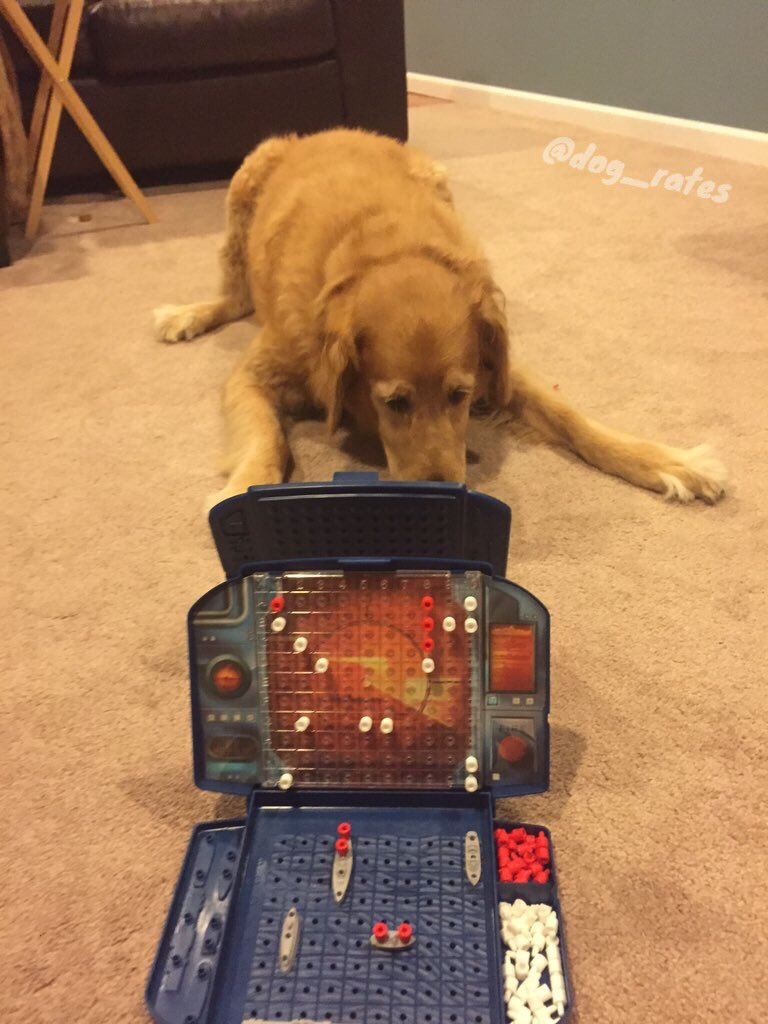

In [194]:
from IPython import display
display.Image("https://pbs.twimg.com/media/Cop9VVUXgAAhX9u.jpg",width=500,height =300)

In [162]:
image_pred_clean['dog_breeds'].value_counts()

golden_retriever        173
Labrador_retriever      113
Pembroke                 96
Chihuahua                95
pug                      65
                       ... 
Scotch_terrier            1
EntleBucher               1
Japanese_spaniel          1
standard_schnauzer        1
Bouvier_des_Flandres      1
Name: dog_breeds, Length: 113, dtype: int64

In [163]:
image_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    1751 non-null   int64  
 1   jpg_url     1751 non-null   object 
 2   img_num     1751 non-null   int64  
 3   p1_conf     1751 non-null   float64
 4   p2_conf     1751 non-null   float64
 5   p3_conf     1751 non-null   float64
 6   dog_breeds  1751 non-null   object 
dtypes: float64(3), int64(2), object(2)
memory usage: 109.4+ KB


#### 7) `img_num` should be in category datatype.

##### Define
Convert img_num to categorical data type.

##### Code

In [164]:
image_pred_clean.img_num =image_pred_clean.img_num.astype('category')

##### Test

In [165]:
image_pred_clean.img_num.dtypes

CategoricalDtype(categories=[1, 2, 3, 4], ordered=False)

In [166]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   retweet_count   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [167]:
image_pred_clean[image_pred_clean['tweet_id'] == '666020888022790149']

,tweet_id,jpg_url,img_num,p1_conf,p2_conf,p3_conf,dog_breeds


In [168]:
tweet_json_clean

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
...,...,...,...
2349,666049248165822465,111,41
2350,666044226329800704,311,147
2351,666033412701032449,128,47
2352,666029285002620928,132,48


#### 8) Merge all dataframes

##### Define
use the merge method to merge the datasets and drop the rows having jpg_url as null.

##### Code

In [169]:
image_pred_clean.tweet_id = image_pred_clean.tweet_id.astype('str')
twitter_archived_clean.tweet_id = twitter_archived_clean.tweet_id.astype('str')
tweet_json_clean.tweet_id = tweet_json_clean.tweet_id.astype('str')

In [170]:
merged = twitter_archived_clean.merge(image_pred_clean, on = 'tweet_id', how = 'left')
merged_final = merged.merge(tweet_json_clean, on = 'tweet_id', how = 'left')

In [171]:
merged_final = merged_final[merged_final.jpg_url.isnull() == False]

##### Test

In [172]:
merged_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1605 entries, 1 to 2025
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1605 non-null   object        
 1   timestamp           1605 non-null   datetime64[ns]
 2   source              1605 non-null   object        
 3   text                1605 non-null   object        
 4   expanded_urls       1605 non-null   object        
 5   rating_numerator    1605 non-null   int64         
 6   rating_denominator  1605 non-null   int64         
 7   name                1605 non-null   object        
 8   dog_stages          262 non-null    category      
 9   jpg_url             1605 non-null   object        
 10  img_num             1605 non-null   category      
 11  p1_conf             1605 non-null   float64       
 12  p2_conf             1605 non-null   float64       
 13  p3_conf             1605 non-null   float64     

#### 9) tweet_id should be in string instead of int

##### Define
Change int to categorical variable

##### Code

In [173]:
merged_final.tweet_id = merged_final.tweet_id.astype('str')

##### Test

In [174]:
merged_final.tweet_id.dtype

dtype('O')

### Storing Data

In [175]:
merged_final.to_csv('twitter_archive_master.csv',index = False)

## Analyzing and Visualizing Data

In [176]:
import seaborn as sns
import matplotlib.pyplot as plt


In [177]:
df = pd.read_csv('twitter_archive_master.csv')

In [178]:
df.sample()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,jpg_url,img_num,p1_conf,p2_conf,p3_conf,dog_breeds,favorite_count,retweet_count
887,706538006853918722,2016-03-06 17:52:42,"<a href=""http://twitter.com/download/iphone"" r...","This is Oliver (pronounced ""Ricardo""). He's a ...",https://twitter.com/dog_rates/status/706538006...,11,10,Oliver,NaN,https://pbs.twimg.com/media/Cc4gjxqW4AIoThO.jpg,1,0.541794,0.094918,0.085439,chow,3778,1580


#### 1) Most Preferable Dog Stage

#### Ans: pupper

In [179]:
df.dog_stages.value_counts()

pupper     172
doggo       60
puppo       27
floofer      3
Name: dog_stages, dtype: int64

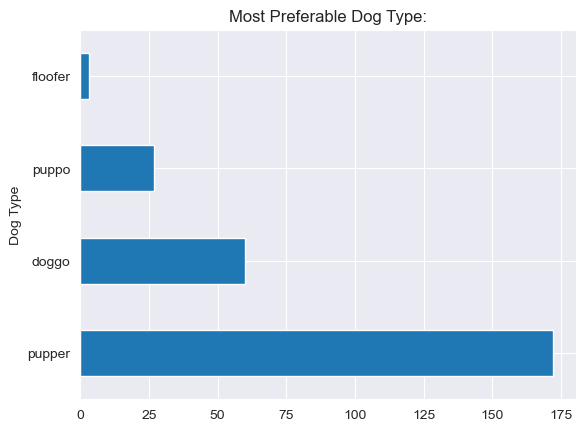

In [180]:
sns.set_style(style = 'darkgrid')
df.dog_stages.value_counts().plot(kind = 'barh');
plt.title('Most Preferable Dog Type:');
plt.ylabel('Dog Type');

#### 2) Most Preffered Dog Breed 

#### Ans: Golden Retriever
- The difference between the preference of the highest (Golden Retriever) and the second highest(Labrodor retriever) preffered dog breed is quite large.
- Chihuahua and Pembroke have almost equal preference. 

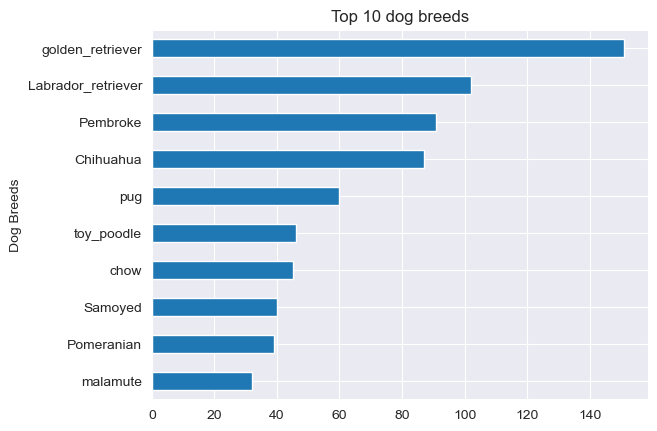

In [181]:
df.dog_breeds.value_counts().sort_values().tail(10).plot(kind = 'barh');
plt.title('Top 10 dog breeds');
plt.ylabel('Dog Breeds');

#### 3)Dog Stages according to favorite counts/retweet counts

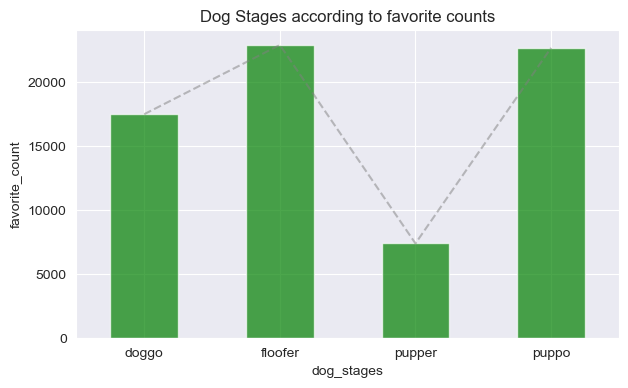

In [182]:
#df.name.value_counts().sort_values().tail(30)[:-1].plot(kind='pie',figsize=(15,5),autopct='%1.0f%%');
df.groupby('dog_stages')['favorite_count'].mean().plot(kind='bar',alpha=0.7,color='green',figsize=(7,4))
plt.ylabel('favorite_count')
plt.title('Dog Stages according to favorite counts')
df.groupby('dog_stages')['favorite_count'].mean().plot(kind='line',color = 'grey',ls='--',alpha=0.5);

In [183]:
print("correlation between favorite_count and retweet_count: ",df['favorite_count'].corr(df['retweet_count']))

correlation between favorite_count and retweet_count:  0.9125573615613207


#### Ans: This tells us the according to favorite and retweet counts, `floofer` is the most preffered dog stage.

#### 4) Trends from 2015 to 2017 as per the favorite counts

In [184]:
df.timestamp = df.timestamp.astype('datetime64[ns]')

In [185]:
df.groupby(df.timestamp.dt.year)['favorite_count'].mean()

timestamp
2015     2729.112051
2016     7740.932598
2017    24134.822785
Name: favorite_count, dtype: float64

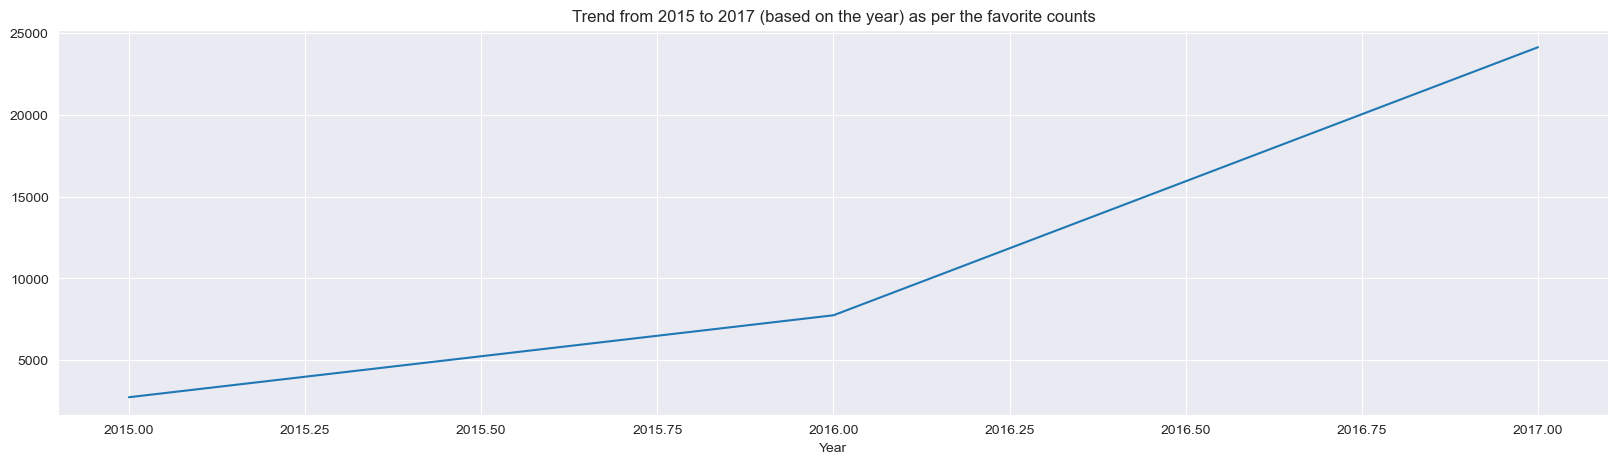

In [186]:
df.groupby(df.timestamp.dt.year)['favorite_count'].mean().plot(kind='line',figsize=(20,5));
plt.title('Trend from 2015 to 2017 (based on the year) as per the favorite counts');
plt.xlabel('Year');

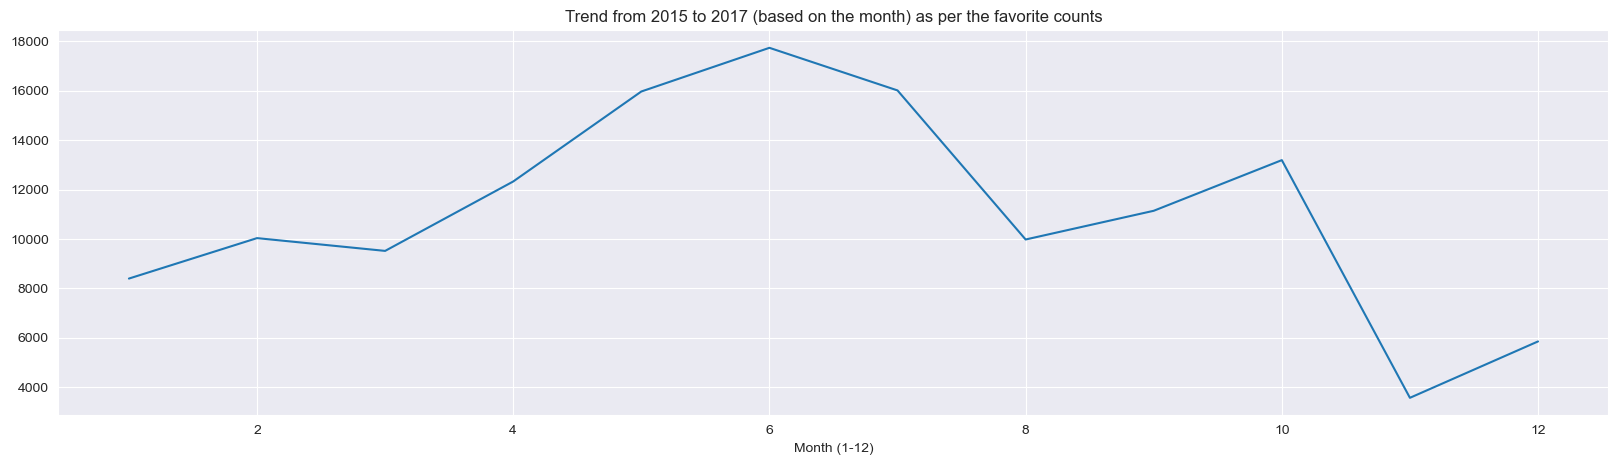

In [187]:
df.groupby(df.timestamp.dt.month)['favorite_count'].mean().plot(kind='line',figsize=(20,5));
plt.title('Trend from 2015 to 2017 (based on the month) as per the favorite counts');
plt.xlabel('Month (1-12)');

##### The month June had the highest number of favorite counts and the month November had the lowest number of favorite counts. Note that the months are irrespective of the years("1" means January of 2015, 2016 and 2017)